# Análise Descritiva de Dados (ADD)

### Distribuição de frequência

### Visualização de dados

### Tendência central, Variação (dispersão / forma) e Associação

### Exemplo 1.
Análise descritiva de dados em uma base de uma escola

In [32]:
#import libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
#set figsize
sns.set(rc={'figure.figsize':(15, 8)})

In [34]:
#extract data
df = pd.read_csv('https://dados.educacao.sp.gov.br/sites/default/files/Quantidade%20de%20alunos%20por%20tipo%20de%20ensino%20da%20rede%20estadual%20-%202021.csv')
df.head()

#* **MUN**: município
#* **ZONA**: zona (1 = urbana, 2 - rural)
#* **ANOS INICIAIS**: Anos iniciais do ensino fundamental
#* **ANOS FINAIS**: Anos finais do ensino fundamental
#* **ENSINO MEDIO**: Anos iniciais do ensino fundamental

,CDREDE,DE,CODMUN,MUN,CATEG,COD_ESC,TIPOESC,CODVINC,NOMESC,ENDESC,...,ZONA,ED_INFANTIL,CLASSES ESPECIAIS,SALA DE RECURSO,ANOS INICIAIS,ANOS FINAIS,ENSINO MEDIO,EJA FUNDAMENTA_AI,EJA FUNDAMENTAL_AF,EJA ENSINO MEDIO
0,10101,NORTE 1,100,SAO PAULO,1,73,8,NaN,JULIO DE FARIA E SOUZA PROFESSOR,POMPEU PEQUENO DE SOUZA BRASIL,...,1.0,0,0,0,456,0,0,0,0,0
1,10101,NORTE 1,100,SAO PAULO,1,127,8,NaN,JOSE ALTENFELDER SILVA PROFESSOR,CARLOS ALBERTO VANZOLINI,...,1.0,0,0,9,717,0,0,0,0,0
2,10101,NORTE 1,100,SAO PAULO,1,139,8,NaN,MARIANO DE OLIVEIRA PROFESSOR,RUA ALMIRANTE ISAIAS DE NORONHA,...,1.0,0,0,0,0,372,1200,0,0,240
3,10101,NORTE 1,100,SAO PAULO,1,164,8,NaN,PIO TELLES PEIXOTO PROFESSOR,ARTUR ORLANDO,...,1.0,0,0,10,0,251,336,0,0,63
4,10101,NORTE 1,100,SAO PAULO,1,231,8,NaN,CHIQUINHA RODRIGUES,CAIAPE,...,1.0,0,3,28,987,0,0,0,0,0


In [35]:
#null and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5351 entries, 0 to 5350
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CDREDE              5351 non-null   int64  
 1   DE                  5351 non-null   object 
 2   CODMUN              5351 non-null   int64  
 3   MUN                 5351 non-null   object 
 4   CATEG               5351 non-null   int64  
 5   COD_ESC             5351 non-null   int64  
 6   TIPOESC             5351 non-null   int64  
 7   CODVINC             259 non-null    float64
 8   NOMESC              5351 non-null   object 
 9   ENDESC              5351 non-null   object 
 10  NUMESC              5327 non-null   object 
 11  BAIESC              5348 non-null   object 
 12  EMAIL               5273 non-null   object 
 13  FONE1               5328 non-null   float64
 14  ZONA                5350 non-null   float64
 15  ED_INFANTIL         5351 non-null   int64  
 16  CLASSE

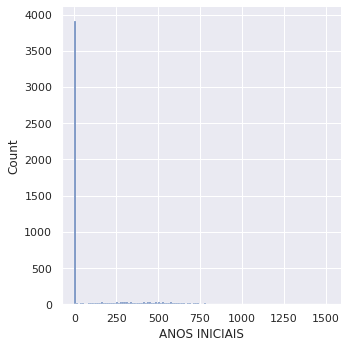

In [36]:
#Distribuição de frequência
sns.displot(df['ANOS INICIAIS'])
plt.show()

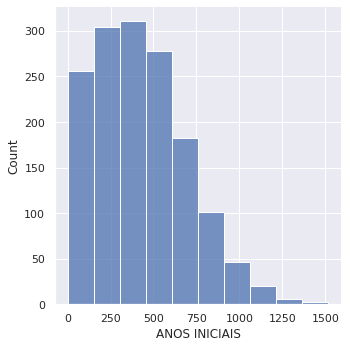

In [37]:
df_escolas = df[df['ANOS INICIAIS'] > 0]

sns.displot(df_escolas['ANOS INICIAIS'], bins=10)
plt.show()

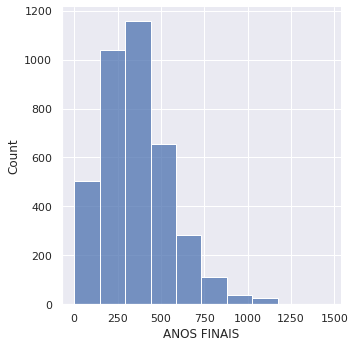

In [38]:
df_escolas = df[df['ANOS FINAIS'] > 0]

sns.displot(df_escolas['ANOS FINAIS'], bins=10)
plt.show()

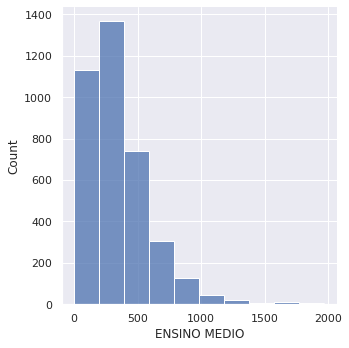

In [39]:
df_escolas = df[df['ENSINO MEDIO'] > 0]

sns.displot(df_escolas['ENSINO MEDIO'], bins=10)
plt.show()

In [42]:
anos_iniciais = df['ANOS INICIAIS'].sum()
anos_finais = df['ANOS FINAIS'].sum()
ensino_medio = df['ENSINO MEDIO'].sum()
(anos_iniciais + anos_finais + ensino_medio)

3319779

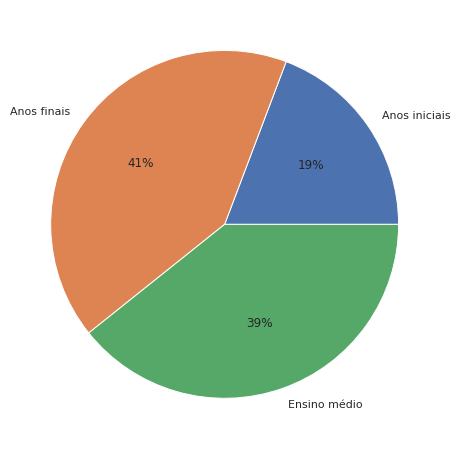

In [25]:
alunos = [anos_iniciais, anos_finais, ensino_medio]
periodo = ['Anos iniciais', 'Anos finais', 'Ensino médio']

plt.pie(alunos, labels=periodo, autopct='%0.0f%%')
plt.show()

In [26]:
#tendência central e dispersão
df['ANOS FINAIS'].describe()

count    5351.000000
mean      257.373388
std       234.971969
min         0.000000
25%         0.000000
50%       253.000000
75%       410.500000
max      1467.000000
Name: ANOS FINAIS, dtype: float64

In [27]:
df_escolas['ENSINO MEDIO'].describe()

count    3751.000000
mean      347.542789
std       249.402102
min         1.000000
25%       173.000000
50%       301.000000
75%       462.000000
max      1970.000000
Name: ENSINO MEDIO, dtype: float64

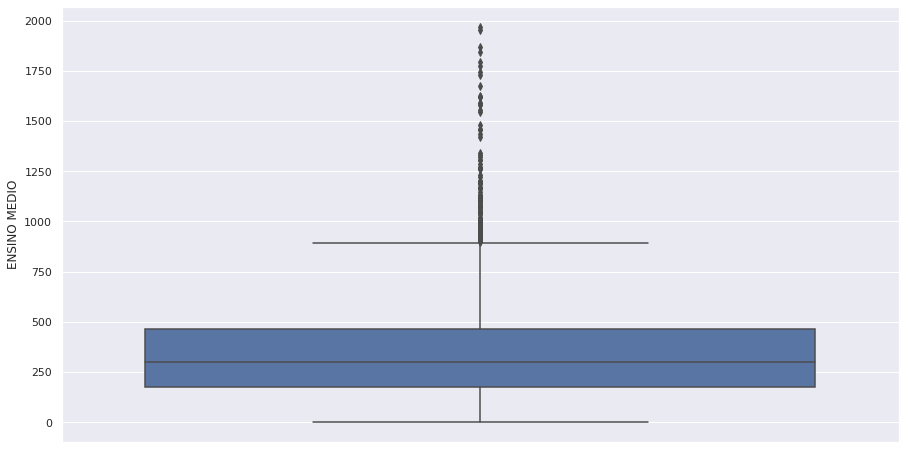

In [28]:
#posição relativa
sns.boxplot(y=df_escolas['ENSINO MEDIO'])
plt.show()

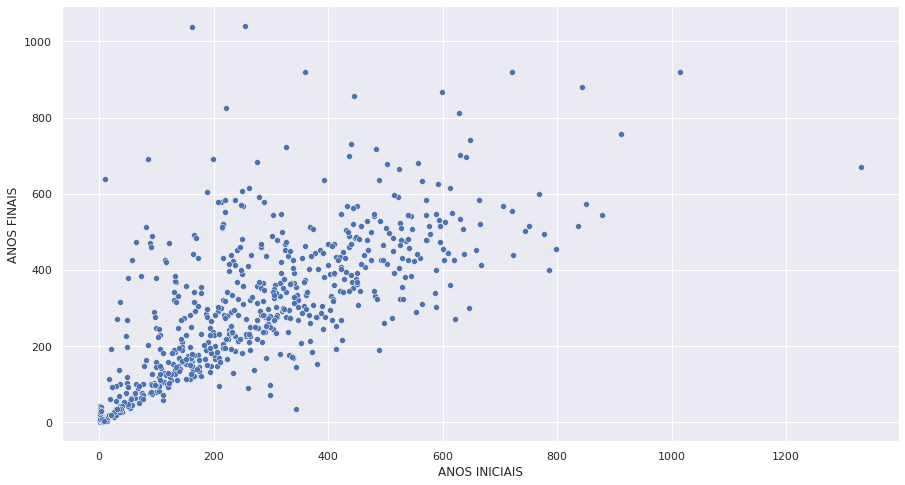

In [33]:
#Associação
df_escolas = df[(df['ANOS FINAIS'] > 0) & (df['ANOS INICIAIS'] > 0)]

sns.scatterplot(x=df_escolas['ANOS INICIAIS'], y=df_escolas['ANOS FINAIS'], data=df_escolas)
plt.show()

### Exemplo 2.

O conjunto de dados a seguir contém informações sobre bebês nascidos e seus pais. Faça as seguintes análises descritivas dos dados:

    I. Faça um histograma dos atributos peso do bebê e altura do bebê.
    II. Gere um gráfico de setores das mães fumantes.
    III. Obtenha a média e o desvio-padrão da altura dos bebês.
    IV. Gere um diagrama de caixa da idade da mãe.
    V. Gere um gráfico de dispersão do peso do bebê e do tempo de gestação. 
    VI. Acrescente a informação de mães fumantes e não fumantes. Para isso, inclua o parâmetro hue na função scatterplot passando o atributo smoker como referência.

In [1]:
#import

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://www.sheffield.ac.uk/polopoly_fs/1.937185!/file/Birthweight_reduced_kg_R.csv')
df.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


In [3]:
df.shape

(42, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           42 non-null     int64  
 1   Length       42 non-null     int64  
 2   Birthweight  42 non-null     float64
 3   Headcirc     42 non-null     int64  
 4   Gestation    42 non-null     int64  
 5   smoker       42 non-null     int64  
 6   mage         42 non-null     int64  
 7   mnocig       42 non-null     int64  
 8   mheight      42 non-null     int64  
 9   mppwt        42 non-null     int64  
 10  fage         42 non-null     int64  
 11  fedyrs       42 non-null     int64  
 12  fnocig       42 non-null     int64  
 13  fheight      42 non-null     int64  
 14  lowbwt       42 non-null     int64  
 15  mage35       42 non-null     int64  
dtypes: float64(1), int64(15)
memory usage: 5.4 KB


#### I.

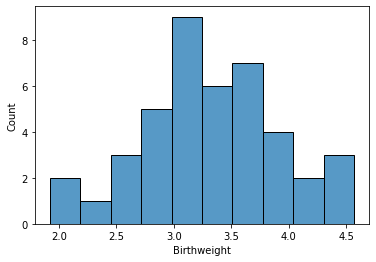

In [5]:
sns.histplot(x = df['Birthweight'], data = df, bins = 10)
plt.show()

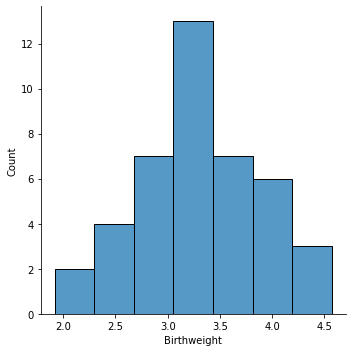

In [9]:
sns.displot(df['Birthweight'])
plt.show()

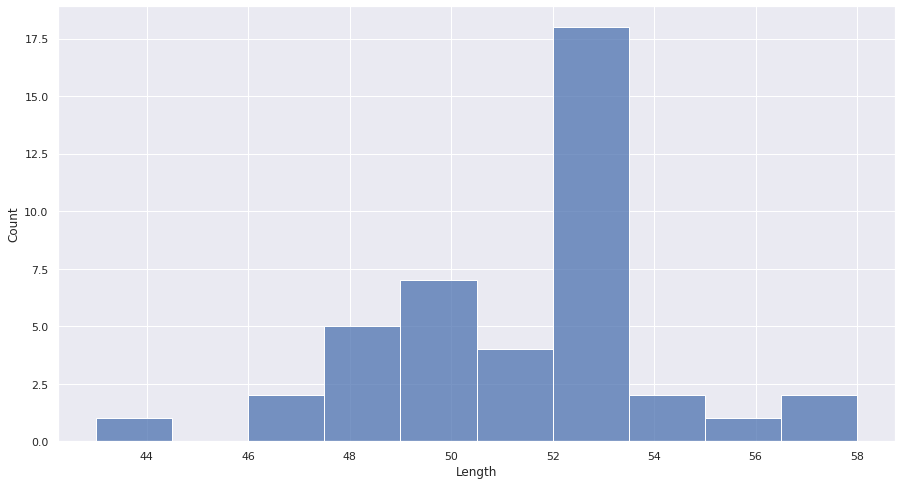

In [51]:
#histograma altura do bebê
sns.histplot(x = df['Length'], data = df, bins = 10)
plt.show()

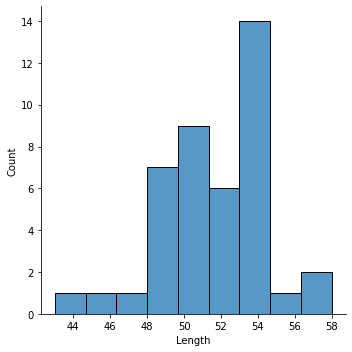

In [10]:
sns.displot(df['Length'])
plt.show()

#### II.

In [11]:
mae_fumante = df[df['smoker'] == 1]
mae_nao_fumante = df[df['smoker'] == 0]

sum_mae_fumante = mae_fumante.shape[0]
sum_mae_nao_fumante = mae_nao_fumante.shape[0]

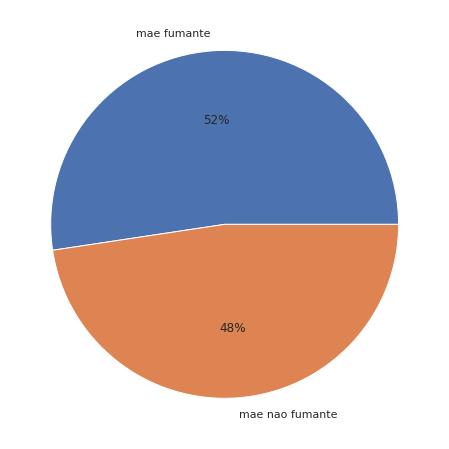

In [54]:
maes = [sum_mae_fumante, sum_mae_nao_fumante]
labels = ['mae fumante', 'mae nao fumante']

plt.pie(maes, labels=labels, autopct='%0.0f%%')
plt.show()

#### III.

In [59]:
mean_length = df['Length'].mean()
std_length = df['Length'].std()
(mean_length, std_length)

(51.333333333333336, 2.935623643940379)

In [60]:
df['Length'].describe()

count    42.000000
mean     51.333333
std       2.935624
min      43.000000
25%      50.000000
50%      52.000000
75%      53.000000
max      58.000000
Name: Length, dtype: float64

#### IV.

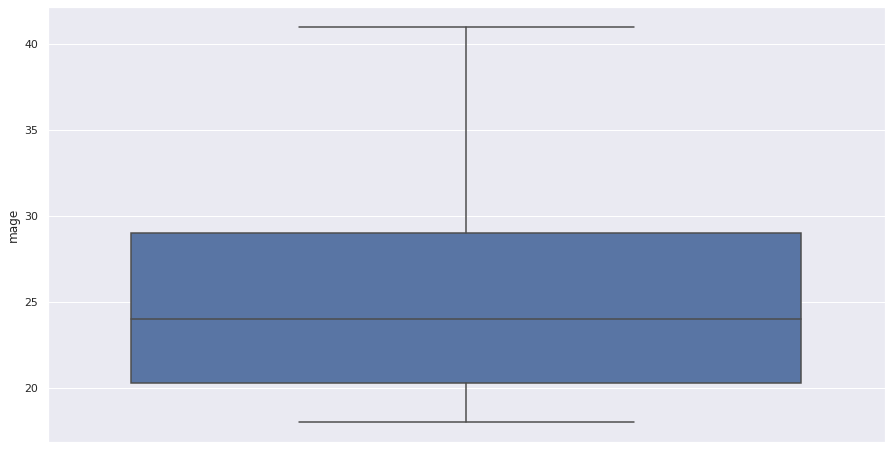

In [61]:
sns.boxplot(y = df['mage'])
plt.show()

#### V.

<AxesSubplot:xlabel='Birthweight', ylabel='Gestation'>

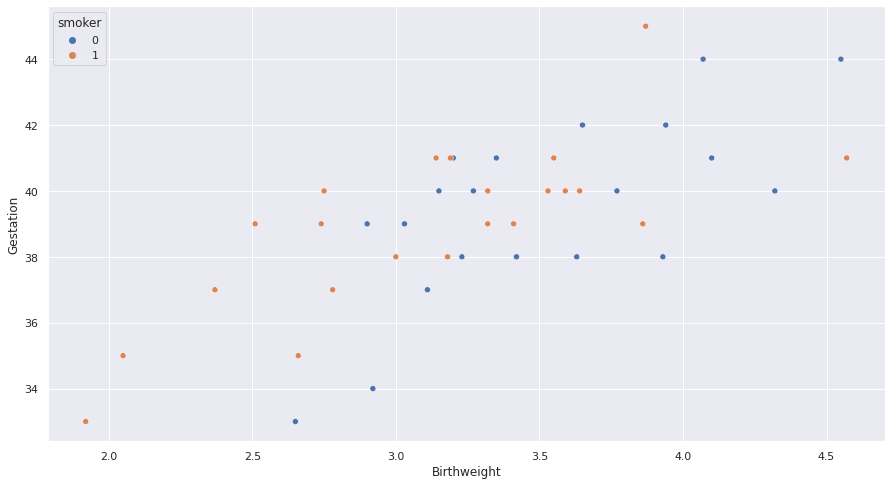

In [68]:
sns.scatterplot(x = df['Birthweight'], y = df['Gestation'], hue = df['smoker'])